# <center> MLR Example -2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./headbrain.csv')

In [3]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
data[130:160]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
130,1,2,3666,1270
131,1,2,3532,1335
132,1,2,4046,1450
133,1,2,3667,1310
134,2,1,2857,1027
135,2,1,3436,1235
136,2,1,3791,1260
137,2,1,3302,1165
138,2,1,3104,1080
139,2,1,3171,1127


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [7]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [8]:
data.shape

(237, 4)

In [9]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [10]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.Gender.value_counts()

1    134
2    103
Name: Gender, dtype: int64

In [13]:
data.rename(columns={'Age Range':'Age_Range','Head Size(cm^3)':'Head_Size(cm^3)','Brain Weight(grams)':'Brain_Weight(grams)'}, inplace=True)

In [14]:
data.columns

Index(['Gender', 'Age_Range', 'Head_Size(cm^3)', 'Brain_Weight(grams)'], dtype='object')

In [15]:
data.Age_Range.value_counts()

2    127
1    110
Name: Age_Range, dtype: int64

## Explaratory Data Analysis

## <u> Univariate Analysis

### <li> <u> Histogram

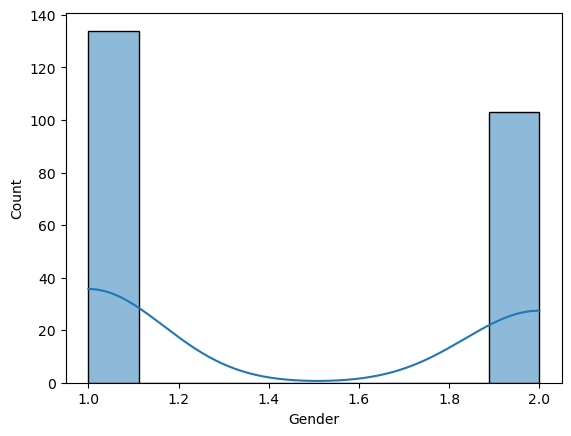

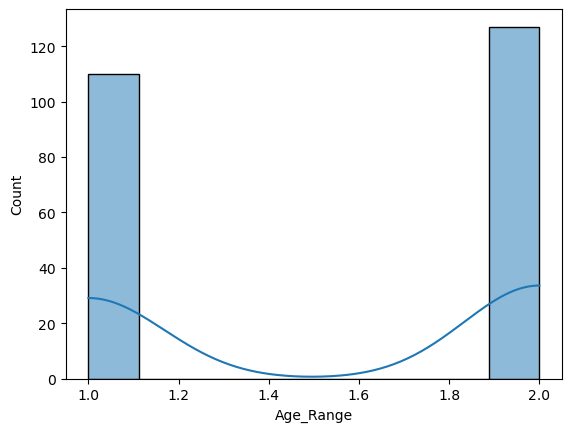

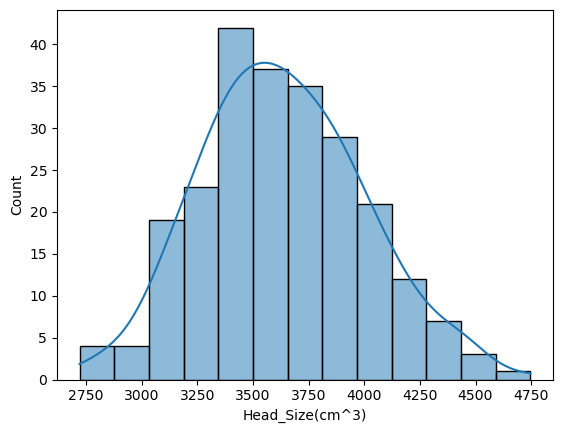

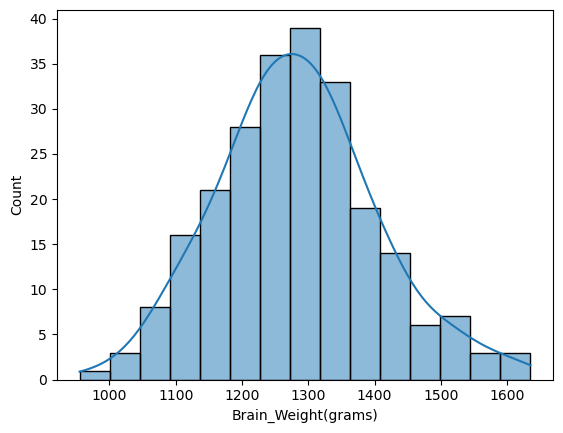

In [16]:
for i in data.columns:
    sns.histplot(data=data[i], kde=True)
    plt.show()

### <li> <u> Boxplot

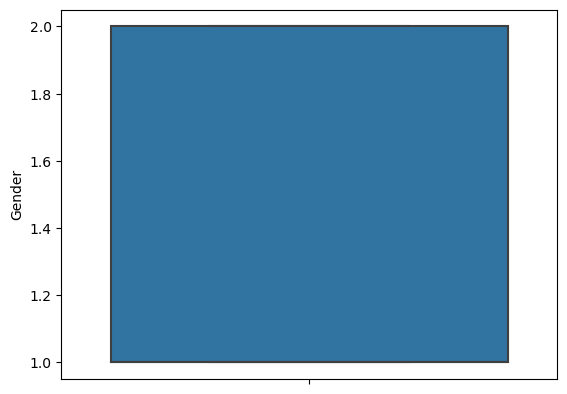

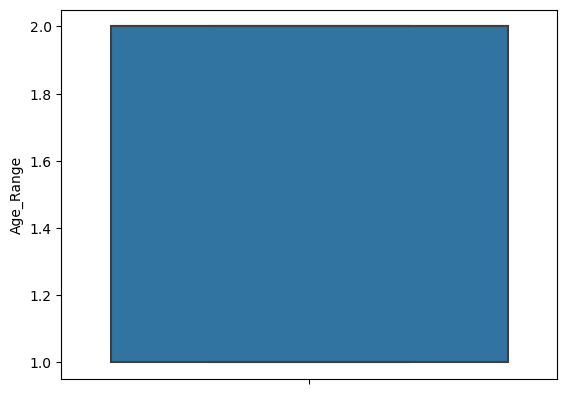

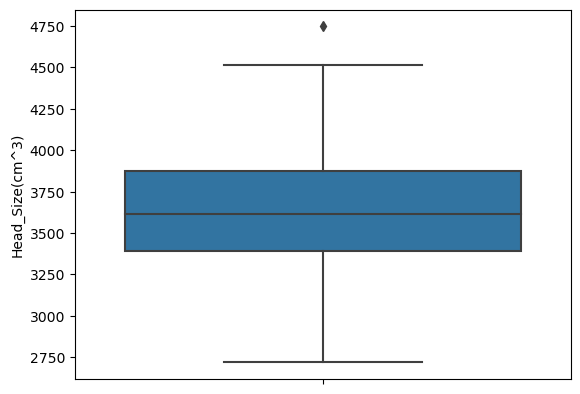

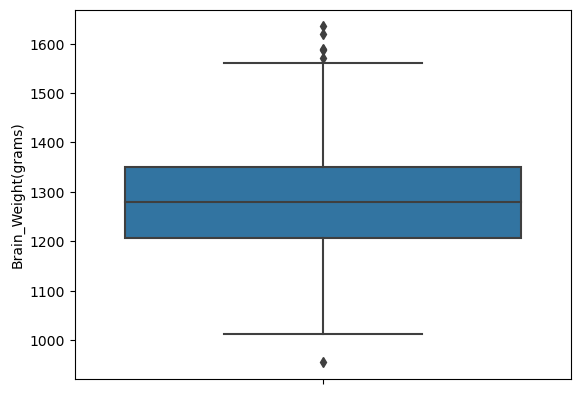

In [17]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

In [18]:
column=['Gender','Age_Range', 'Head_Size(cm^3)', 'Brain_Weight(grams)']

### OUTLIER Treatment

In [19]:
def outlier_limit(column):
    Q3,Q1 = np.nanpercentile(column,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [20]:
for i in column:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL),np.nan,data[i])

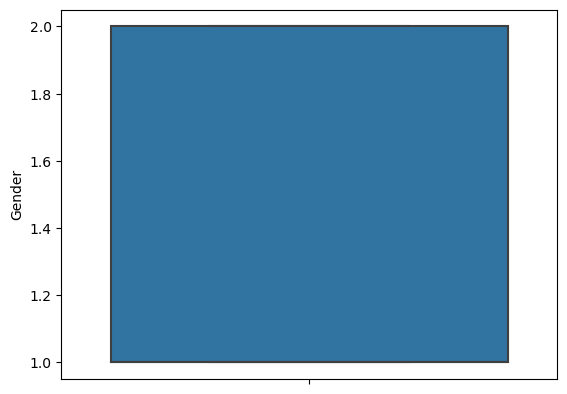

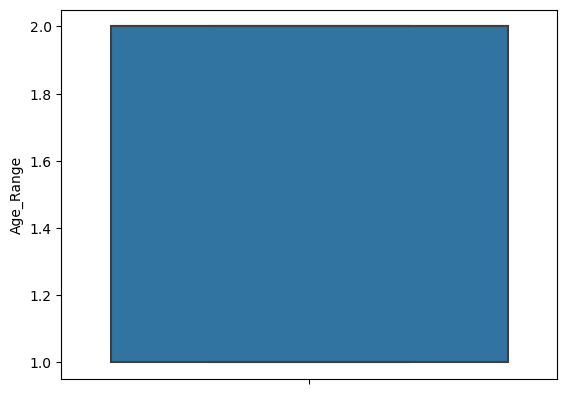

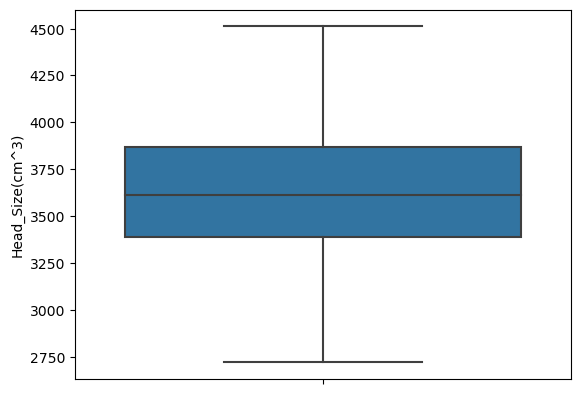

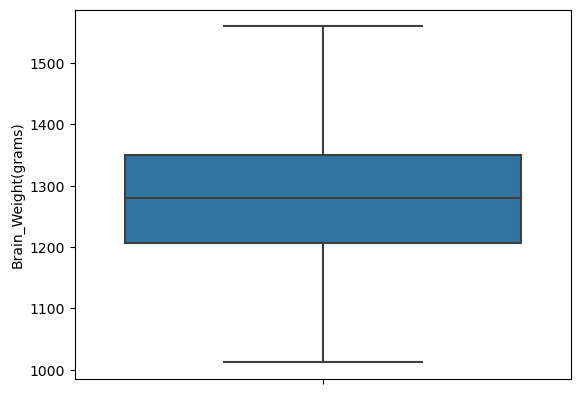

In [21]:
for i in column:
    sns.boxplot(y=data[i])
    plt.show()

In [22]:
data.dropna(inplace=True)

### <li> <u> Heatmap

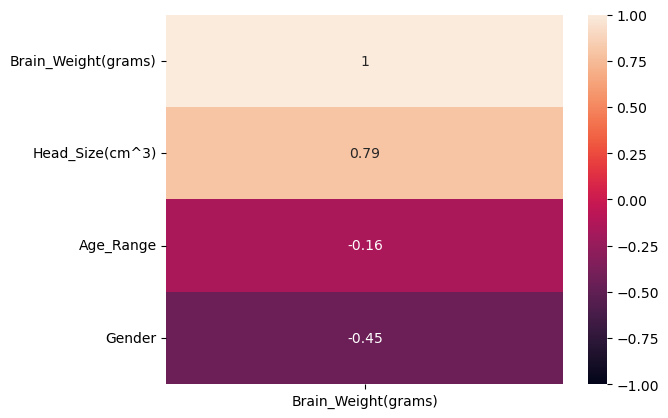

In [23]:
sns.heatmap(data.corr()[['Brain_Weight(grams)']].sort_values(by='Brain_Weight(grams)',ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

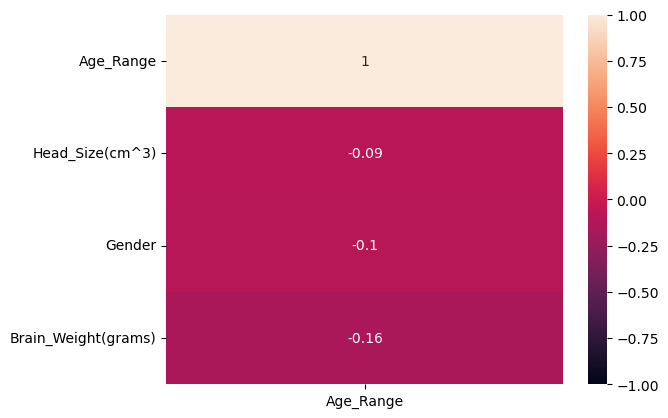

In [24]:
sns.heatmap(data.corr()[['Age_Range']].sort_values(by='Age_Range',ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

In [25]:
data.columns

Index(['Gender', 'Age_Range', 'Head_Size(cm^3)', 'Brain_Weight(grams)'], dtype='object')

In [51]:
data1=data[['Head_Size(cm^3)', 'Brain_Weight(grams)']]

In [52]:
data1

,Head_Size(cm^3),Brain_Weight(grams)
0,4512.0,1530.0
1,3738.0,1297.0
2,4261.0,1335.0
3,3777.0,1282.0
5,3585.0,1300.0
...,...,...
232,3214.0,1110.0
233,3394.0,1215.0
234,3233.0,1104.0
235,3352.0,1170.0


### Selecting Features and Targets

In [53]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [29]:
x

array([[4512.],
       [3738.],
       [4261.],
       [3777.],
       [3585.],
       [3785.],
       [3559.],
       [3613.],
       [3982.],
       [3443.],
       [3993.],
       [3640.],
       [4208.],
       [3832.],
       [3876.],
       [3497.],
       [3466.],
       [3095.],
       [4424.],
       [3878.],
       [4046.],
       [3804.],
       [3710.],
       [4423.],
       [4036.],
       [4022.],
       [3454.],
       [4175.],
       [3787.],
       [3796.],
       [4103.],
       [4161.],
       [4158.],
       [3814.],
       [3527.],
       [3748.],
       [3334.],
       [3492.],
       [3962.],
       [3505.],
       [4315.],
       [3863.],
       [4034.],
       [4308.],
       [3165.],
       [3641.],
       [3644.],
       [3891.],
       [3793.],
       [4270.],
       [4063.],
       [4012.],
       [3458.],
       [3890.],
       [4166.],
       [3935.],
       [3669.],
       [3866.],
       [3393.],
       [4442.],
       [4253.],
       [3727.],
       [

In [54]:
y

array([1530., 1297., 1335., 1282., 1300., 1400., 1255., 1355., 1375.,
       1340., 1380., 1355., 1522., 1208., 1405., 1358., 1292., 1340.,
       1400., 1357., 1287., 1275., 1270., 1505., 1490., 1485., 1310.,
       1420., 1318., 1432., 1364., 1405., 1432., 1207., 1375., 1350.,
       1236., 1250., 1350., 1320., 1525., 1340., 1422., 1506., 1215.,
       1311., 1300., 1224., 1350., 1335., 1390., 1400., 1225., 1310.,
       1560., 1330., 1222., 1415., 1175., 1330., 1485., 1470., 1135.,
       1310., 1154., 1510., 1415., 1468., 1390., 1380., 1432., 1240.,
       1195., 1225., 1188., 1252., 1315., 1245., 1430., 1279., 1245.,
       1309., 1412., 1120., 1220., 1280., 1440., 1370., 1192., 1230.,
       1346., 1290., 1165., 1240., 1132., 1242., 1270., 1218., 1430.,
       1320., 1290., 1260., 1425., 1226., 1360., 1310., 1250., 1295.,
       1290., 1290., 1275., 1250., 1270., 1362., 1300., 1173., 1256.,
       1440., 1180., 1306., 1350., 1125., 1165., 1312., 1300., 1270.,
       1335., 1450.,

### Feature Scaling

### Initializing Standard Scaler

In [55]:
sc = StandardScaler()

In [56]:
x=sc.fit_transform(x)

In [57]:
x

array([[ 2.52905033],
       [ 0.32082146],
       [ 1.8129451 ],
       [ 0.43208881],
       [-0.11568889],
       [ 0.45491288],
       [-0.18986712],
       [-0.03580464],
       [ 1.01695563],
       [-0.52081615],
       [ 1.04833873],
       [ 0.0412266 ],
       [ 1.66173563],
       [ 0.5890043 ],
       [ 0.71453669],
       [-0.36675367],
       [-0.45519695],
       [-1.51366324],
       [ 2.27798555],
       [ 0.72024271],
       [ 1.1995482 ],
       [ 0.50912005],
       [ 0.24093722],
       [ 2.27513254],
       [ 1.17101811],
       [ 1.13107598],
       [-0.48943305],
       [ 1.56758634],
       [ 0.4606189 ],
       [ 0.48629598],
       [ 1.3621697 ],
       [ 1.52764422],
       [ 1.51908519],
       [ 0.53765014],
       [-0.28116341],
       [ 0.34935155],
       [-0.83179412],
       [-0.38101872],
       [ 0.95989545],
       [-0.3439296 ],
       [ 1.96700758],
       [ 0.67744757],
       [ 1.16531209],
       [ 1.94703652],
       [-1.31395262],
       [ 0

### Splitting the data 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [59]:
x_test

array([[ 0.06119766],
       [ 2.15530617],
       [-0.52081615],
       [-1.20553828],
       [-0.36675367],
       [ 0.18958306],
       [ 1.13107598],
       [-1.13421306],
       [-1.01723969],
       [-0.26689836],
       [-2.17270829],
       [ 0.72024271],
       [-0.42096084],
       [-1.26830447],
       [ 0.18102403],
       [-1.28542253],
       [-0.86317722],
       [ 1.3621697 ],
       [-1.17415518],
       [-1.31395262],
       [-0.09001181],
       [-0.7633219 ],
       [-0.12995394],
       [ 0.01840252],
       [ 0.11540483],
       [ 2.27798555],
       [ 0.15534695],
       [ 0.06405067],
       [ 0.82865704],
       [-0.62637748],
       [ 0.64321147],
       [ 1.79012103],
       [-0.03295163],
       [ 0.0440796 ],
       [-0.45519695],
       [ 1.1995482 ],
       [-0.36675367],
       [ 1.21381324],
       [ 0.64035846],
       [-1.52792828],
       [-0.43522589],
       [-0.93735545],
       [-0.49799208],
       [-0.19272013],
       [ 1.3935528 ],
       [ 0

### Model Building

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = model.predict(x_test)

In [63]:
y_pred

array([1278.83763125, 1465.98465043, 1226.8240183 , 1165.63153246,
       1240.59232761, 1290.31122235, 1374.45089037, 1172.00574974,
       1182.45946607, 1249.51623179, 1079.19714622, 1337.73539887,
       1235.74792248, 1160.02222126, 1289.54631627, 1158.49240911,
       1196.22777538, 1395.10335434, 1168.43618806, 1155.94272221,
       1265.32429063, 1205.15167956, 1261.75472896, 1275.01310089,
       1283.68203638, 1476.94830414, 1287.25159806, 1279.09259994,
       1347.42420912, 1217.39017673, 1330.85124421, 1433.34865798,
       1270.42366445, 1277.30781911, 1232.68829819, 1380.57013895,
       1240.59232761, 1381.84498241, 1330.59627552, 1136.82007038,
       1234.47307902, 1189.59858941, 1228.86376782, 1256.14541776,
       1397.90800994, 1343.34471007, 1153.64800399])

#### Evaluating the accuracy

In [64]:
r2_score(y_test,y_pred)

0.5919199838767479

#### Testing accuracy

In [65]:
model.score(x_test,y_test)

0.5919199838767479

#### Training accuracy

In [66]:
model.score(x_train,y_train)

0.6266111486672457

In [67]:
mean_absolute_error(y_test, y_pred)

51.86018581656748

In [68]:
mean_squared_error(y_test, y_pred)

3860.709621653986

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

62.13460888791355

In [70]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL','PREDICTED'])

In [71]:
OUTPUT.head()

,ACTUAL,PREDICTED
0,1408.0,1278.837631
1,1415.0,1465.984650
2,1340.0,1226.824018
3,1180.0,1165.631532
4,1358.0,1240.592328


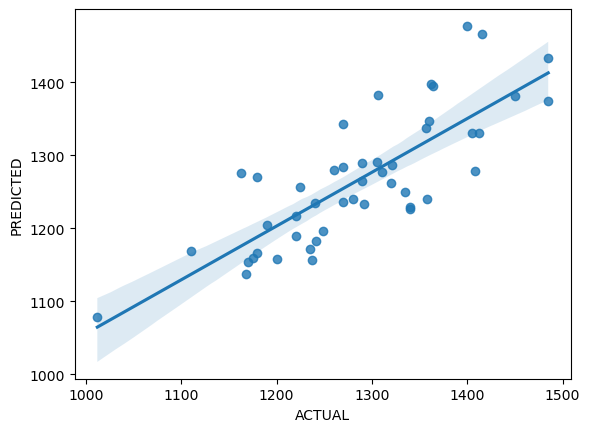

In [72]:
sns.regplot(data=OUTPUT, x="ACTUAL", y="PREDICTED")
plt.show()

### Creating a dictionary of models for iterative purposes

In [73]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

### Using a for loop for model training and testing¶

In [75]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training score: ",training_score)
    print("testing score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse: ",rmse)
    print("*"*100)    

model trained with LinearRegression
r2score:  59.19199838767479
training score:  62.66111486672457
testing score:  59.19199838767479
mae:  51.86018581656748
mse:  3860.709621653986
rmse:  62.13460888791355
****************************************************************************************************
model trained with Ridge
r2score:  59.31822237678489
training score:  62.65928526188389
testing score:  59.31822237678489
mae:  51.71749154103035
mse:  3848.7679888862162
rmse:  62.03843960711952
****************************************************************************************************
model trained with Lasso
r2score:  59.4478299732938
training score:  62.65327458486486
testing score:  59.4478299732938
mae:  51.564797211083736
mse:  3836.50624425008
rmse:  61.93953700384012
****************************************************************************************************
model trained with LinearSVR
r2score:  -12853.529871641877
training score:  -9330.175757420246
testing